Load the Data

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import zipfile
import io

from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the data into a DataFrame
for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f'Loaded {filename}')

# Display the first few rows of the DataFrame
data.head()



KeyboardInterrupt: 

**Loading the Data and visulization**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Butterworth filter function for noise removal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the lowpass filter
cutoff_frequency = 50.0  # Hz
sampling_frequency = 250.0  # Hz (adjust based on actual data)

# Assuming 'data' is the DataFrame loaded from PhysioNet
# Removing missing values
data = data.dropna()

# Apply the filter to each lead
for lead in data.columns[1:]:
    data[lead] = butter_lowpass_filter(data[lead], cutoff_frequency, sampling_frequency)

# Normalize the data
data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Preview the preprocessed data
print(data.head())


   1.000000000000000000e+00  7.582644820213317871e-01  \
0                  0.908425                  0.156765   
1                  0.730088                 -1.250270   
2                  1.000000                 -1.671525   
3                  0.570470                 -0.986254   
4                  1.000000                  0.121473   

   1.115702465176582336e-01  0.000000000000000000e+00  \
0                  0.698872                  0.905938   
1                 -0.323899                  0.624544   
2                 -0.556948                  0.352867   
3                 -0.074519                  0.036621   
4                  0.393573                 -0.361706   

   8.057851344347000122e-02  7.851240038871765137e-02  \
0                  1.246719                  1.118680   
1                  0.155841                 -0.396344   
2                 -0.643733                 -1.271942   
3                 -1.051898                 -1.446739   
4                 -1.122687  

**PreProcessing**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Butterworth filter function for noise removal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters for the lowpass filter
cutoff_frequency = 50.0  # Hz
sampling_frequency = 250.0  # Hz (adjust based on actual data)

# Assuming 'data' is the DataFrame loaded from PhysioNet
# Removing missing values
data = data.dropna()

# Apply the filter to each lead
for lead in data.columns[1:]:
    data[lead] = butter_lowpass_filter(data[lead], cutoff_frequency, sampling_frequency)

# Normalize the data
data.iloc[:, 1:] = (data.iloc[:, 1:] - data.iloc[:, 1:].mean()) / data.iloc[:, 1:].std()

# Preview the preprocessed data
print(data.head())


   1.000000000000000000e+00  7.582644820213317871e-01  \
0                  0.908425                  0.160995   
1                  0.730088                 -1.166295   
2                  1.000000                 -1.648468   
3                  0.570470                 -1.081749   
4                  1.000000                  0.026890   

   1.115702465176582336e-01  0.000000000000000000e+00  \
0                  0.716323                  0.919783   
1                 -0.161666                  0.673390   
2                 -0.473490                  0.372276   
3                 -0.182894                 -0.000908   
4                  0.253056                 -0.401780   

   8.057851344347000122e-02  7.851240038871765137e-02  \
0                  1.265979                  1.141236   
1                  0.203065                 -0.276771   
2                 -0.643089                 -1.240777   
3                 -1.116806                 -1.576469   
4                 -1.170932  

**Peak Detection and Wave Segmentation**

Peak Detection using Pan-Tompkins Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function to apply Pan-Tompkins algorithm for QRS detection
def pan_tompkins(signal, sampling_rate):
    # Bandpass filter (5-15 Hz) - for simplicity, using a simple bandpass filter
    lowcut = 5.0
    highcut = 15.0
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(1, [low, high], btype='band')
    filtered_ecg = filtfilt(b, a, signal)

    # Differentiation
    diff_ecg = np.diff(filtered_ecg)

    # Squaring
    squared_ecg = diff_ecg ** 2

    # Moving average integration
    window_size = int(0.150 * sampling_rate)
    integrated_ecg = np.convolve(squared_ecg, np.ones(window_size)/window_size, mode='same')

    # Find peaks
    threshold = np.mean(integrated_ecg) * 1.5
    peaks, _ = find_peaks(integrated_ecg, height=threshold, distance=sampling_rate*0.6)

    return peaks, integrated_ecg

# Assuming 'data' is the DataFrame with ECG data
# Using Lead II for R peak detection
#lead = 'Lead II'
sampling_rate = 250.0  # Hz (adjust based on actual data)

# Apply Pan-Tompkins algorithm
r_peaks, integrated_ecg = pan_tompkins(data.values, sampling_rate)

# Plot the results
plt.figure(figsize=(15, 5))
'''
plt.plot(data['Time (s)'], data[lead], label='ECG Signal')
plt.plot(data['Time (s)'][r_peaks], data[lead][r_peaks], 'ro', label='R Peaks')
'''
plt.plot(data['Time (s)'], data, label='ECG Signal')
plt.plot(data['Time (s)'][r_peaks], data[r_peaks], 'ro', label='R Peaks')
plt.title('ECG Signal with R Peaks Detected')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()


ValueError: object too deep for desired array

Wave Segmentation

In [ ]:
# P Wave and T Wave segmentation functions
def segment_wave(signal, r_peaks, wave_type='P', window_size=0.2, sampling_rate=250.0):
    segments = []
    half_window = int(window_size * sampling_rate / 2)

    for r_peak in r_peaks:
        if wave_type == 'P':
            start = max(0, r_peak - 2 * half_window)
            end = r_peak - half_window
        elif wave_type == 'T':
            start = r_peak + half_window
            end = min(len(signal), r_peak + 2 * half_window)

        segment = signal[start:end]
        segments.append((start, end, segment))

    return segments

# Segment P waves and T waves
p_wave_segments = segment_wave(data[lead].values, r_peaks, wave_type='P', window_size=0.2, sampling_rate=sampling_rate)
t_wave_segments = segment_wave(data[lead].values, r_peaks, wave_type='T', window_size=0.2, sampling_rate=sampling_rate)

# Plotting example segments
plt.figure(figsize=(15, 5))

# Plot a few P wave segments
for i, (start, end, segment) in enumerate(p_wave_segments[:5]):
    plt.plot(np.arange(start, end) / sampling_rate, segment, label=f'P Wave Segment {i+1}')

plt.title('P Wave Segments')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

# Plot a few T wave segments
for i, (start, end, segment) in enumerate(t_wave_segments[:5]):
    plt.plot(np.arange(start, end) / sampling_rate, segment, label=f'T Wave Segment {i+1}')

plt.title('T Wave Segments')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()


**AUTOMATE THE DETECTION**

Data Preparation

In [ ]:
import numpy as np

# Function to create labeled segments for training
def create_labeled_segments(signal, r_peaks, sampling_rate, window_size=0.4):
    half_window = int(window_size * sampling_rate / 2)
    segments = []
    labels = []

    for r_peak in r_peaks:
        # Create segments for P wave, QRS complex, and T wave
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)

        segments.append(signal[p_start:p_end])
        labels.append(0)  # Label 0 for P wave

        segments.append(signal[qrs_start:qrs_end])
        labels.append(1)  # Label 1 for QRS complex

        segments.append(signal[t_start:t_end])
        labels.append(2)  # Label 2 for T wave

    return np.array(segments), np.array(labels)

# Create labeled segments for training
segments, labels = create_labeled_segments(data[lead].values, r_peaks, sampling_rate)
segments = segments.reshape(segments.shape[0], segments.shape[1], 1)  # Reshape for CNN input


KeyError: 'Lead II'

Make a CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 classes: P wave, QRS complex, T wave

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
input_shape = (segments.shape[1], segments.shape[2])
cnn_model = create_cnn_model(input_shape)


Train the Model

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(segments, labels, test_size=0.2, random_state=42)

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Predict Using the Model

In [ ]:
# Function to predict waves using the trained model
def predict_waves(signal, r_peaks, model, sampling_rate, window_size=0.4):
    half_window = int(window_size * sampling_rate / 2)
    predictions = []

    for r_peak in r_peaks:
        # Segment around the R peak
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)

        p_segment = signal[p_start:p_end].reshape(1, -1, 1)
        qrs_segment = signal[qrs_start:qrs_end].reshape(1, -1, 1)
        t_segment = signal[t_start:t_end].reshape(1, -1, 1)

        p_pred = model.predict(p_segment).argmax()
        qrs_pred = model.predict(qrs_segment).argmax()
        t_pred = model.predict(t_segment).argmax()

        predictions.append((p_start, p_end, p_pred))
        predictions.append((qrs_start, qrs_end, qrs_pred))
        predictions.append((t_start, t_end, t_pred))

    return predictions

# Predict waves on new ECG data
predictions = predict_waves(data[lead].values, r_peaks, cnn_model, sampling_rate)

# Plot the predictions
plt.figure(figsize=(15, 5))
plt.plot(data['Time (s)'], data[lead], label='ECG Signal')

for (start, end, pred) in predictions:
    if pred == 0:
        color = 'g'  # P wave
    elif pred == 1:
        color = 'r'  # QRS complex
    elif pred == 2:
        color = 'b'  # T wave
    plt.plot(np.arange(start, end) / sampling_rate, data[lead][start:end], color)

plt.title('ECG Signal with Predicted Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()


To apply the CNN model for wave detection on the PhysioNet dataset, you'll follow these steps, you have already loaded the dataset and performed necessary preprocessing (such as peak detection using Pan-Tompkins algorithm and wave segmentation):
Step-by-Step Approach

    Load the PhysioNet Dataset:
        Ensure you have the ECG data from PhysioNet loaded into a pandas DataFrame, with columns representing time and various leads (e.g., Lead I, Lead II).

    Peak Detection and Segmentation:
        Implement peak detection algorithms like Pan-Tompkins to find R peaks.
        Segment the ECG signal around these R peaks to capture P waves, QRS complexes, and T waves.

    Prepare Data for CNN:
        Create labeled segments from the segmented waves, ensuring each segment corresponds to a P wave, QRS complex, or T wave.
        Reshape the data to fit the input requirements of the CNN model.

    Train the CNN Model:
        Split the labeled segments into training and testing sets.
        Define and train the CNN model using the training data.

    Predict Using the Trained Model:
        Apply the trained model to predict wave types (P, QRS, T) on new ECG data segments.

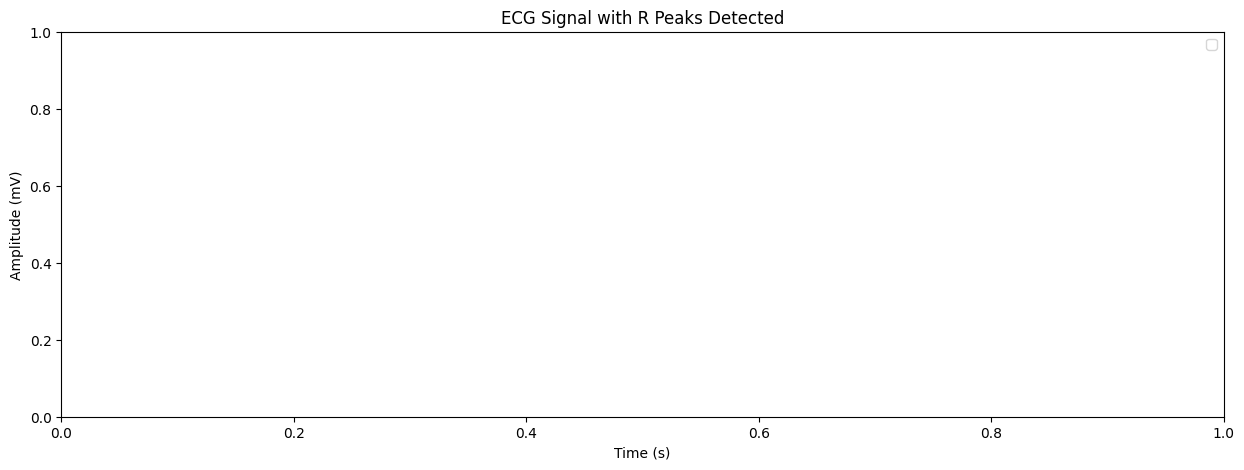

Epoch 1/10
6/6 [==============================] - 4s 240ms/step - loss: 0.9484 - accuracy: 0.4706 - val_loss: 0.7778 - val_accuracy: 0.5581
Epoch 2/10
6/6 [==============================] - 0s 38ms/step - loss: 0.6328 - accuracy: 0.7000 - val_loss: 0.6408 - val_accuracy: 0.5581
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 0.5224 - accuracy: 0.7235 - val_loss: 0.5101 - val_accuracy: 0.7209
Epoch 4/10
6/6 [==============================] - 0s 25ms/step - loss: 0.5523 - accuracy: 0.6529 - val_loss: 0.5307 - val_accuracy: 0.5814
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 0.4308 - accuracy: 0.7706 - val_loss: 0.5173 - val_accuracy: 0.6744
Epoch 6/10
6/6 [==============================] - 0s 22ms/step - loss: 0.5230 - accuracy: 0.6529 - val_loss: 0.5525 - val_accuracy: 0.5349
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: 0.4671 - accuracy: 0.7588 - val_loss: 0.5575 - val_accuracy: 0.5116
Epoch 8/10
6/6 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Function to apply Pan-Tompkins algorithm for QRS detection
def pan_tompkins(signal, sampling_rate):
    # Bandpass filter (5-15 Hz) - for simplicity, using a simple bandpass filter
    lowcut = 5.0
    highcut = 15.0
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(1, [low, high], btype='band')
    filtered_ecg = filtfilt(b, a, signal)

    # Differentiation
    diff_ecg = np.diff(filtered_ecg)

    # Squaring
    squared_ecg = diff_ecg ** 2

    # Moving average integration
    window_size = int(0.150 * sampling_rate)
    integrated_ecg = np.convolve(squared_ecg, np.ones(window_size)/window_size, mode='same')

    # Find peaks
    threshold = np.mean(integrated_ecg) * 1.5
    peaks, _ = find_peaks(integrated_ecg, height=threshold, distance=sampling_rate*0.6)

    return peaks, integrated_ecg

# Function to create labeled segments for training
# Function to create labeled segments for training
def create_labeled_segments(signal, r_peaks, sampling_rate, window_size=0.4):
    half_window = int(window_size * sampling_rate / 2)
    segments = []
    labels = []

    for r_peak in r_peaks:
        # Create segments for P wave, QRS complex, and T wave
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)

        # Ensure all segments have the same length by padding or truncating
        segment_length = int(window_size * sampling_rate)

        p_segment = signal[p_start:p_end]
        p_segment = pad_or_truncate(p_segment, segment_length) # Pad or truncate P wave segment
        segments.append(p_segment)
        labels.append(0)  # Label 0 for P wave

        qrs_segment = signal[qrs_start:qrs_end]
        qrs_segment = pad_or_truncate(qrs_segment, segment_length) # Pad or truncate QRS complex segment
        segments.append(qrs_segment)
        labels.append(1)  # Label 1 for QRS complex

        t_segment = signal[t_start:t_end]
        t_segment = pad_or_truncate(t_segment, segment_length) # Pad or truncate T wave segment
        segments.append(t_segment)
        labels.append(2)  # Label 2 for T wave

    return np.array(segments), np.array(labels)

# Helper function to pad or truncate segments to a fixed length
def pad_or_truncate(segment, target_length):
    if len(segment) < target_length:
        # Pad with zeros
        return np.pad(segment, (0, target_length - len(segment)))
    elif len(segment) > target_length:
        # Truncate
        return segment[:target_length]
    else:
        return segment

# Function to create and compile the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 classes: P wave, QRS complex, T wave

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load the PhysioNet dataset (assuming it's already loaded into 'data' DataFrame)
# Example assumes 'data' has columns: 'Time (s)', 'Lead I', 'Lead II', ...

# Select a lead for analysis
'''lead = 'Lead II' '''
sampling_rate = 250.0  # Hz (adjust based on actual data)

# Load ECG signal from the dataset
# Assuming 'data' DataFrame has the ECG signals and 'Time (s)' column
ecg_signal = data['0.000000000000000000e+00.1'].values
#time = data['Time (s)'].values

# Step 1: Peak Detection using Pan-Tompkins algorithm
peaks, integrated_ecg = pan_tompkins(ecg_signal, sampling_rate)

# Plotting the ECG signal with detected R peaks (optional for visualization)
plt.figure(figsize=(15, 5))
#plt.plot(time, ecg_signal, label='ECG Signal')
#plt.plot(time[peaks], ecg_signal[peaks], 'ro', label='R Peaks')
plt.title('ECG Signal with R Peaks Detected')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

# Step 2: Create labeled segments for training
segments, labels = create_labeled_segments(ecg_signal, peaks, sampling_rate)
segments = segments.reshape(segments.shape[0], segments.shape[1], 1)  # Reshape for CNN input

# Step 3: Create and compile the CNN model
input_shape = (segments.shape[1], segments.shape[2])
cnn_model = create_cnn_model(input_shape)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(segments, labels, test_size=0.2, random_state=42)

# Step 5: Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Predict waves using the trained model (on new data if needed)
# Example: Predict waves on a new segment
new_segment = ecg_signal[5000:5100].reshape(1, -1, 1)  # Example segment
prediction = cnn_model.predict(new_segment).argmax()

# Print the prediction (0 for P wave, 1 for QRS complex, 2 for T wave)
if prediction == 0:
    print("Predicted: P wave")
elif prediction == 1:
    print("Predicted: QRS complex")
elif prediction == 2:
    print("Predicted: T wave")

cnn_model.save('trained_cnn_model.h5')


modified

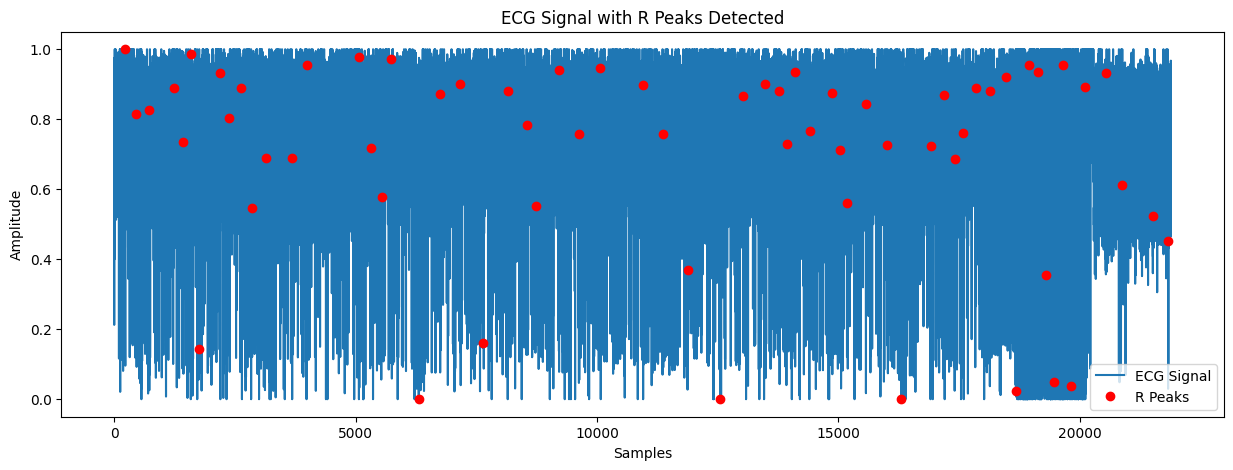

Epoch 1/10
5/5 [==============================] - 7s 162ms/step - loss: 1.0127 - accuracy: 0.5828 - val_loss: 0.9867 - val_accuracy: 0.4211
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.7777 - accuracy: 0.7285 - val_loss: 0.7079 - val_accuracy: 0.4211
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.5420 - accuracy: 0.6623 - val_loss: 0.5850 - val_accuracy: 0.4211
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.4613 - accuracy: 0.7483 - val_loss: 0.6697 - val_accuracy: 0.4211
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.4671 - accuracy: 0.7682 - val_loss: 0.4870 - val_accuracy: 0.8421
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 0.4850 - accuracy: 0.7285 - val_loss: 0.6306 - val_accuracy: 0.4211
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 0.4280 - accuracy: 0.7351 - val_loss: 0.5671 - val_accuracy: 0.4211
Epoch 8/10
5/5 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Function to apply Pan-Tompkins algorithm for QRS detection
def pan_tompkins(signal, sampling_rate):
    lowcut = 5.0
    highcut = 15.0
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(1, [low, high], btype='band')
    filtered_ecg = filtfilt(b, a, signal)
    diff_ecg = np.diff(filtered_ecg)
    squared_ecg = diff_ecg ** 2
    window_size = int(0.150 * sampling_rate)
    integrated_ecg = np.convolve(squared_ecg, np.ones(window_size)/window_size, mode='same')
    threshold = np.mean(integrated_ecg) * 1.5 # put 0.7-0.8
    peaks, _ = find_peaks(integrated_ecg, height=threshold, distance=sampling_rate*0.6)
    return peaks, integrated_ecg

#

# Function to create labeled segments for training
def create_labeled_segments(signal, r_peaks, sampling_rate, window_size=0.4):
    segments = []
    labels = []
    for r_peak in r_peaks:
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)
        segment_length = int(window_size * sampling_rate)
        p_segment = pad_or_truncate(signal[p_start:p_end], segment_length)
        segments.append(p_segment)
        labels.append(0)
        qrs_segment = pad_or_truncate(signal[qrs_start:qrs_end], segment_length)
        segments.append(qrs_segment)
        labels.append(1)
        t_segment = pad_or_truncate(signal[t_start:t_end], segment_length)
        segments.append(t_segment)
        labels.append(2)
    return np.array(segments), np.array(labels)

# Helper function to pad or truncate segments to a fixed length
def pad_or_truncate(segment, target_length):
    if len(segment) < target_length:
        return np.pad(segment, (0, target_length - len(segment)))
    elif len(segment) > target_length:
        return segment[:target_length]
    else:
        return segment

# Function to create and compile the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load the ECG signal from the CSV file
def load_ecg_data(csv_file):
    ecg_data = pd.read_csv(csv_file, header=None)
    ecg_signal = ecg_data.iloc[:, 1].values
    return ecg_signal

# Load the PhysioNet dataset (assuming the ECG data is in a single column without headers)
csv_file = '/content/mitbih_test.csv.zip'
sampling_rate = 250.0  # Hz (adjust based on actual data)

# Load ECG signal from the dataset
ecg_signal = load_ecg_data(csv_file)

# Step 1: Peak Detection using Pan-Tompkins algorithm
peaks, integrated_ecg = pan_tompkins(ecg_signal, sampling_rate)

# Plotting the ECG signal with detected R peaks (optional for visualization)
plt.figure(figsize=(15, 5))
plt.plot(ecg_signal, label='ECG Signal')
plt.plot(peaks, ecg_signal[peaks], 'ro', label='R Peaks')
plt.title('ECG Signal with R Peaks Detected')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Step 2: Create labeled segments for training
segments, labels = create_labeled_segments(ecg_signal, peaks, sampling_rate)
segments = segments.reshape(segments.shape[0], segments.shape[1], 1)

# Step 3: Create and compile the CNN model
input_shape = (segments.shape[1], segments.shape[2])
cnn_model = create_cnn_model(input_shape)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(segments, labels, test_size=0.2, random_state=42)

# Step 5: Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Predict waves using the trained model (on new data if needed)
new_segment = ecg_signal[5000:5100].reshape(1, -1, 1)  # Example segment
prediction = cnn_model.predict(new_segment).argmax()

# Print the prediction (0 for P wave, 1 for QRS complex, 2 for T wave)
if prediction == 0:
    print("Predicted: P wave")
elif prediction == 1:
    print("Predicted: QRS complex")
elif prediction == 2:
    print("Predicted: T wave")

# Save the trained model
cnn_model.save('trained_cnn_model.h5')


chatgpt modified newest

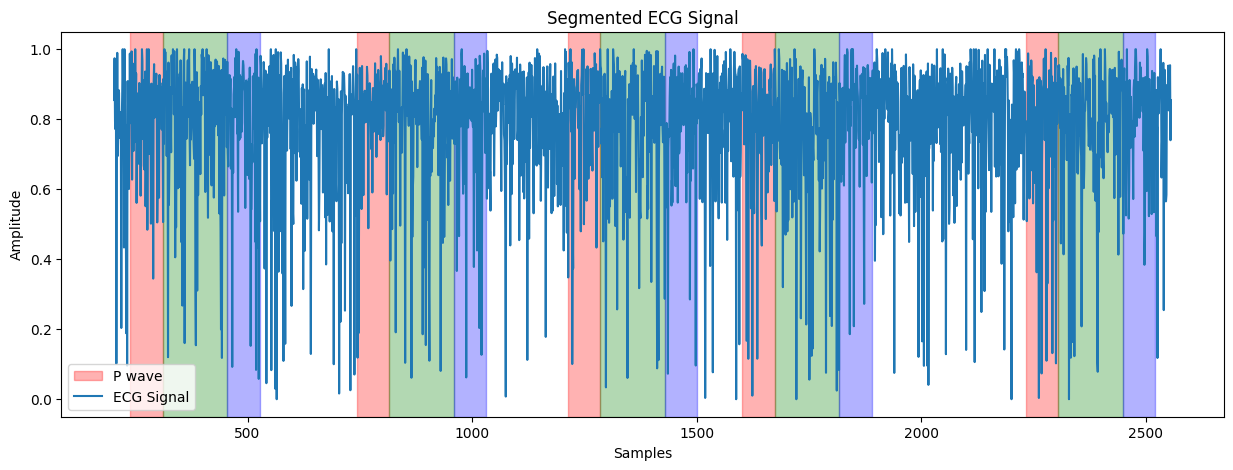

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
import zipfile
import os

# Extract CSV file from zip
def extract_csv_from_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    extracted_files = zip_ref.namelist()
    csv_file = [file for file in extracted_files if file.endswith('.csv')][0]
    return os.path.join(extract_to, csv_file)

# Load the ECG signal from the CSV file
def load_ecg_data(csv_file):
    ecg_data = pd.read_csv(csv_file, header=None)
    ecg_signal = ecg_data.iloc[:, 1].values
    return ecg_signal

# Bandpass filter
def bandpass_filter(signal, lowcut, highcut, sampling_rate, order=1):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Detect R peaks
def detect_r_peaks(signal, sampling_rate):
    lowcut = 5.0
    highcut = 15.0
    filtered_signal = bandpass_filter(signal, lowcut, highcut, sampling_rate)
    diff_signal = np.diff(filtered_signal)
    squared_signal = diff_signal ** 2
    window_size = int(0.150 * sampling_rate)
    integrated_signal = np.convolve(squared_signal, np.ones(window_size)/window_size, mode='same')
    threshold = np.mean(integrated_signal) * 1.5
    peaks, _ = find_peaks(integrated_signal, height=threshold, distance=sampling_rate*0.6)
    return peaks

# Segment the ECG signal
def segment_ecg(signal, r_peaks, sampling_rate):
    segments = []
    for r_peak in r_peaks:
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)
        segments.append((p_start, p_end, 'P'))
        segments.append((qrs_start, qrs_end, 'QRS'))
        segments.append((t_start, t_end, 'T'))
    return segments

# Correct overlapping segments
def correct_segments(segments):
    corrected_segments = []
    prev_label = None
    for start, end, label in segments:
        if label == prev_label:
            if label == 'P':
                corrected_segments[-1] = (corrected_segments[-1][0], corrected_segments[-1][1], 'T')
            elif label == 'T':
                label = 'P'
        corrected_segments.append((start, end, label))
        prev_label = label
    return corrected_segments

# Plot the ECG signal with segments
def plot_ecg_with_segments(signal, segments, plot_range):
    plt.figure(figsize=(15, 5))
    for start, end, label in segments:
        if label == 'P':
            plt.axvspan(start, end, color='red', alpha=0.3, label='P wave' if start == segments[0][0] else "")
        elif label == 'QRS':
            plt.axvspan(start, end, color='green', alpha=0.3, label='QRS complex' if start == segments[0][0] else "")
        elif label == 'T':
            plt.axvspan(start, end, color='blue', alpha=0.3, label='T wave' if start == segments[0][0] else "")
    plt.plot(range(plot_range[0], plot_range[1]), signal[plot_range[0]:plot_range[1]], label='ECG Signal')
    plt.title('Segmented ECG Signal')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Main script
zip_file = '/content/mitbih_test.csv.zip'
extract_to = '/content'
sampling_rate = 360.0  # Adjust based on actual data

# Extract and load ECG signal from the dataset
csv_file = extract_csv_from_zip(zip_file, extract_to)
ecg_signal = load_ecg_data(csv_file)

# Detect R peaks
r_peaks = detect_r_peaks(ecg_signal, sampling_rate)

# Focus on the first few R peaks for plotting
num_peaks_to_plot = 5
r_peaks_to_plot = r_peaks[:num_peaks_to_plot]
plot_range = (r_peaks_to_plot[0] - int(0.5 * sampling_rate), r_peaks_to_plot[-1] + int(0.5 * sampling_rate))

# Segment the ECG signal
segments = segment_ecg(ecg_signal, r_peaks_to_plot, sampling_rate)

# Correct misclassified segments
segments = correct_segments(segments)

# Plot the segmented ECG signal
plot_ecg_with_segments(ecg_signal, segments, plot_range)


CONFUSION MATRIX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


2/2 [==============================] - 0s 7ms/step


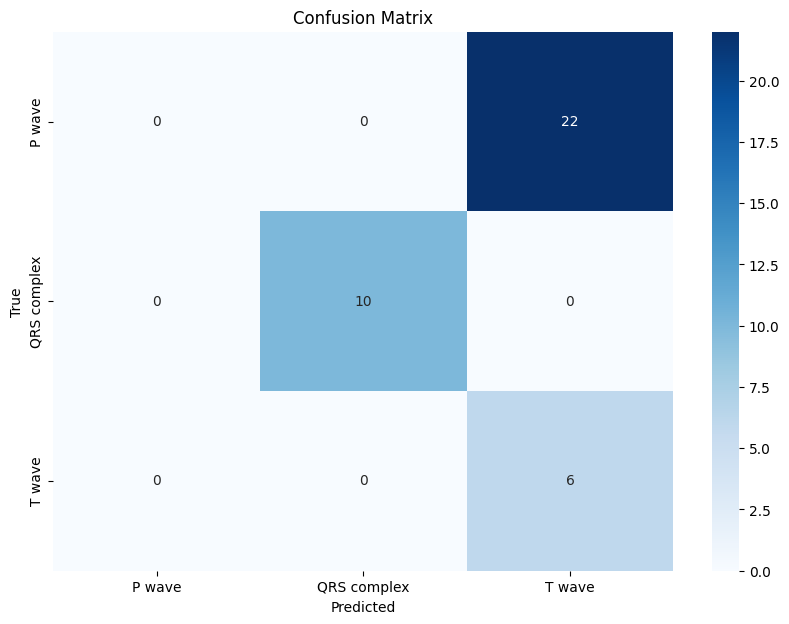

              precision    recall  f1-score   support

      P wave       0.00      0.00      0.00        22
 QRS complex       1.00      1.00      1.00        10
      T wave       0.21      1.00      0.35         6

    accuracy                           0.42        38
   macro avg       0.40      0.67      0.45        38
weighted avg       0.30      0.42      0.32        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = cnn_model.predict(X_test).argmax(axis=1)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['P wave', 'QRS complex', 'T wave']

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

next modified

[[0.01253918 0.84369117 0.97952753 ... 0.         0.         0.        ]
 [0.82051283 1.         0.96031743 ... 0.8318584  1.         1.        ]
 [0.98880595 0.99707174 0.96516693 ... 0.         0.         0.        ]
 ...
 [0.75272727 0.94485295 0.88368797 ... 0.         0.         0.        ]
 [0.84322035 0.58657241 0.92004776 ... 0.66355139 0.54081631 0.7638889 ]
 [0.74242425 0.67656767 0.87062567 ... 0.         0.         0.        ]] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2
 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2]
Epoch 1/10
5/5 [==============================] - 1s 83ms/step - loss: 0.9853 - accuracy: 0.6093 - val_loss: 1.0179 - val_accuracy: 0.4211
Epoch 2/10
5/5 [================

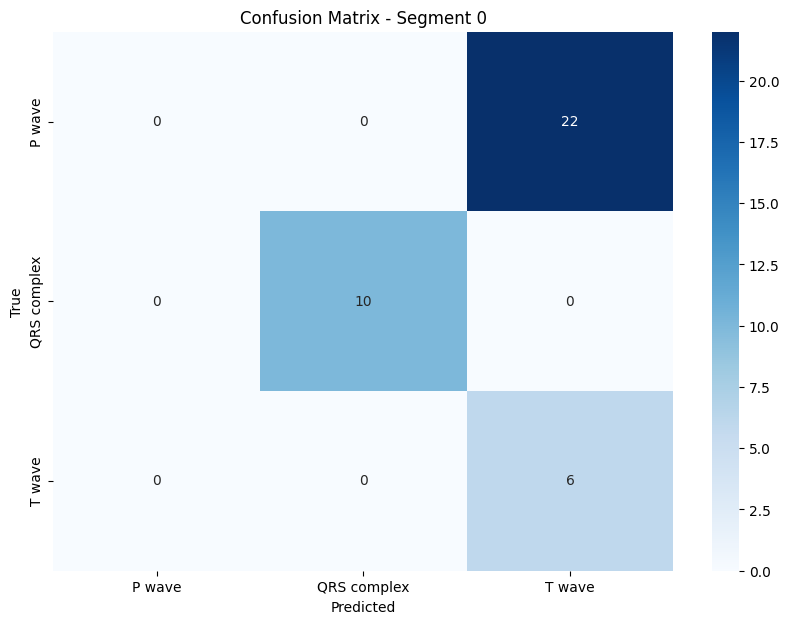

Classification Report - Segment 0:
              precision    recall  f1-score   support

      P wave       0.00      0.00      0.00        22
 QRS complex       1.00      1.00      1.00        10
      T wave       0.21      1.00      0.35         6

    accuracy                           0.42        38
   macro avg       0.40      0.67      0.45        38
weighted avg       0.30      0.42      0.32        38

[[1.         0.76595747 0.98003328 ... 0.         0.         0.        ]
 [0.53571427 0.80894309 0.83829784 ... 0.66796875 0.65671641 0.71888727]
 [0.93613935 0.55138338 0.71428573 ... 0.         0.         0.        ]
 ...
 [0.81350482 0.49013159 1.         ... 0.         0.         0.        ]
 [0.42562929 0.63157892 0.70462048 ... 0.77222222 0.61338288 0.4635193 ]
 [0.54225349 0.93033707 0.52439022 ... 0.         0.         0.        ]] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

Epoch 1/10
5/5 [==============================] - 1s 79ms/step - loss: 0.9647 - accuracy: 0.6358 - val_loss: 0.9466 - val_accuracy: 0.4211
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.6889 - accuracy: 0.7086 - val_loss: 0.6978 - val_accuracy: 0.4211
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 0.5670 - accuracy: 0.6358 - val_loss: 0.5597 - val_accuracy: 0.4211
Epoch 4/10
5/5 [==============================] - 0s 25ms/step - loss: 0.5134 - accuracy: 0.6821 - val_loss: 0.7204 - val_accuracy: 0.4211
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4588 - accuracy: 0.7219 - val_loss: 0.5664 - val_accuracy: 0.4211
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4996 - accuracy: 0.6556 - val_loss: 0.5197 - val_accuracy: 0.4211
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.4469 - accuracy: 0.7152 - val_loss: 0.5818 - val_accuracy: 0.4211
Epoch 8/10
5/5 [===========

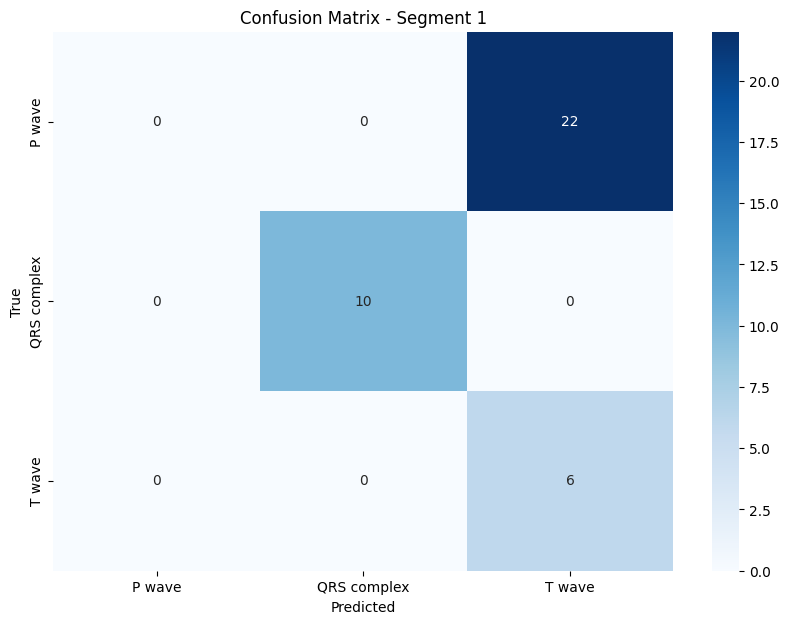

Classification Report - Segment 1:
              precision    recall  f1-score   support

      P wave       0.00      0.00      0.00        22
 QRS complex       1.00      1.00      1.00        10
      T wave       0.21      1.00      0.35         6

    accuracy                           0.42        38
   macro avg       0.40      0.67      0.45        38
weighted avg       0.30      0.42      0.32        38

[[0.22137405 0.75381261 0.462908   ... 0.         0.         0.        ]
 [0.04424779 0.42857143 0.79497355 ... 0.67943549 0.61254615 0.58771932]
 [0.22857143 0.60869563 0.23906706 ... 0.         0.         0.        ]
 ...
 [0.65329051 0.80769229 0.15625    ... 0.         0.         0.        ]
 [0.14971209 0.03267974 0.05135952 ... 0.46372688 0.33783785 0.76642334]
 [0.42771083 0.64468867 0.6640777  ... 0.         0.         0.        ]] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

Epoch 1/10
5/5 [==============================] - 2s 77ms/step - loss: 1.0386 - accuracy: 0.5897 - val_loss: 0.9552 - val_accuracy: 0.5128
Epoch 2/10
5/5 [==============================] - 0s 36ms/step - loss: 0.8449 - accuracy: 0.7179 - val_loss: 0.7621 - val_accuracy: 0.5128
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 0.6262 - accuracy: 0.6923 - val_loss: 0.5570 - val_accuracy: 0.5128
Epoch 4/10
5/5 [==============================] - 0s 36ms/step - loss: 0.5147 - accuracy: 0.6795 - val_loss: 0.4872 - val_accuracy: 0.5128
Epoch 5/10
5/5 [==============================] - 0s 35ms/step - loss: 0.4707 - accuracy: 0.7308 - val_loss: 0.5398 - val_accuracy: 0.5128
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4865 - accuracy: 0.6731 - val_loss: 0.4840 - val_accuracy: 0.5385
Epoch 7/10
5/5 [==============================] - 0s 42ms/step - loss: 0.4482 - accuracy: 0.7115 - val_loss: 0.5195 - val_accuracy: 0.5128
Epoch 8/10
5/5 [===========

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Function to apply Pan-Tompkins algorithm for QRS detection
def pan_tompkins(signal, sampling_rate):
    lowcut = 5.0
    highcut = 15.0
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(1, [low, high], btype='band')
    filtered_ecg = filtfilt(b, a, signal)
    diff_ecg = np.diff(filtered_ecg)
    squared_ecg = diff_ecg ** 2
    window_size = int(0.150 * sampling_rate)
    integrated_ecg = np.convolve(squared_ecg, np.ones(window_size)/window_size, mode='same')
    threshold = np.mean(integrated_ecg) * 1.5
    peaks, _ = find_peaks(integrated_ecg, height=threshold, distance=sampling_rate*0.6)
    return peaks, integrated_ecg

# Function to create labeled segments for training
def create_labeled_segments(signal, r_peaks, sampling_rate, window_size=0.4):
    segments = []
    labels = []
    for r_peak in r_peaks:
        p_start = max(0, r_peak - int(0.4 * sampling_rate))
        p_end = r_peak - int(0.2 * sampling_rate)
        qrs_start = r_peak - int(0.2 * sampling_rate)
        qrs_end = r_peak + int(0.2 * sampling_rate)
        t_start = r_peak + int(0.2 * sampling_rate)
        t_end = r_peak + int(0.4 * sampling_rate)
        segment_length = int(window_size * sampling_rate)
        p_segment = pad_or_truncate(signal[p_start:p_end], segment_length)
        segments.append(p_segment)
        labels.append(0)
        qrs_segment = pad_or_truncate(signal[qrs_start:qrs_end], segment_length)
        segments.append(qrs_segment)
        labels.append(1)
        t_segment = pad_or_truncate(signal[t_start:t_end], segment_length)
        segments.append(t_segment)
        labels.append(2)
    print(np.array(segments) , np.array(labels))
    return np.array(segments), np.array(labels)

# Helper function to pad or truncate segments to a fixed length
def pad_or_truncate(segment, target_length):
    if len(segment) < target_length:
        return np.pad(segment, (0, target_length - len(segment)))
    elif len(segment) > target_length:
        return segment[:target_length]
    else:
        return segment

# Function to create and compile the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load the ECG signal from the CSV file
def load_ecg_data(csv_file):
    ecg_data = pd.read_csv('/content/mitbih_test.csv.zip', header=None)
    return ecg_data

# Main function to process ECG segments and train the CNN model
def process_and_train_model(csv_file):
    ecg_data = load_ecg_data(csv_file)
    sampling_rate = 250.0  # Adjust based on your data

    # Iterate through each column (assuming each column is an ECG segment)
    for column in ecg_data.columns:
        ecg_signal = ecg_data[column].values

        # Step 1: Peak Detection using Pan-Tompkins algorithm
        peaks, integrated_ecg = pan_tompkins(ecg_signal, sampling_rate)

        # Step 2: Create labeled segments for training
        segments, labels = create_labeled_segments(ecg_signal, peaks, sampling_rate)
        segments = segments.reshape(segments.shape[0], segments.shape[1], 1)

        # Step 3: Create and compile the CNN model
        input_shape = (segments.shape[1], segments.shape[2])
        cnn_model = create_cnn_model(input_shape)

        # Step 4: Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(segments, labels, test_size=0.2, random_state=42)

        # Step 5: Train the CNN model
        history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

        # Step 6: Evaluate the model on test data
        y_pred = cnn_model.predict(X_test).argmax(axis=1)

        # Step 7: Plotting the confusion matrix
        class_names = ['P wave', 'QRS complex', 'T wave']
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - Segment {column}')
        plt.show()

        # Step 8: Print classification report
        print(f"Classification Report - Segment {column}:")
        print(classification_report(y_test, y_pred, target_names=class_names))

        # Step 9: Save the trained model (if desired)
        cnn_model.save(f'trained_cnn_model_{column}.h5')

# Example usage:
if __name__ == "__main__":
    csv_file = 'path_to_your_ecg_data.csv'
    process_and_train_model(csv_file)


EXAMPLE USAGE ON A TRAINED MODEL

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from tensorflow.keras.models import load_model

# Function to load and preprocess new ECG data
def load_ecg_data(csv_file):
    # Load CSV file containing multiple ECG segments
    ecg_data = pd.read_csv('/content/mitbih_test.csv.zip')
    segments = []
    for index, row in ecg_data.iterrows():
        # Example: Perform peak detection on row['ECG_signal'] and segment around R peaks
        peaks, _ = find_peaks(row['ECG_signal'], height=0.1)
        for r_peak in peaks:
            p_start = max(0, r_peak - 50)
            p_end = r_peak - 25
            qrs_start = r_peak - 25
            qrs_end = r_peak + 25
            t_start = r_peak + 25
            t_end = r_peak + 50
            segments.append({
                'segment': row['ECG_signal'][p_start:p_end],
                'label': 0
            })
            segments.append({
                'segment': row['ECG_signal'][qrs_start:qrs_end],
                'label': 1
            })
            segments.append({
                'segment': row['ECG_signal'][t_start:t_end],
                'label': 2
            })
    return segments

# Function to predict using the trained CNN model
def predict_segments(segments, cnn_model):
    predicted_labels = []
    for segment_data in segments:
        segment = np.array(segment_data['segment']).reshape(1, -1, 1)
        prediction = cnn_model.predict(segment)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)
    return predicted_labels

# Example usage
if __name__ == "__main__":
    cnn_model = load_model('trained_cnn_model.h5')
    csv_file = 'path_to_your_new_ecg_data.csv'
    segments = load_ecg_data(csv_file)
    predicted_labels = predict_segments(segments, cnn_model)
    print(predicted_labels)


KeyError: 'ECG_signal'

Explanation

    Step 1: We load the PhysioNet dataset assuming it's already in a DataFrame format (data). We select a lead (Lead II) for analysis.

    Step 2: Using the pan_tompkins function, we detect R peaks in the selected lead's ECG signal. This function applies a bandpass filter, differentiation, squaring, and moving average integration to enhance QRS complexes and detect R peaks.

    Step 3: With R peak positions identified, the create_labeled_segments function segments the ECG signal into labeled segments for P waves, QRS complexes, and T waves based on the detected R peaks.

    Step 4: The CNN model architecture (create_cnn_model) is defined and compiled using TensorFlow/Keras. This CNN model is designed to classify segments into P wave, QRS complex, or T wave categories.

    Step 5: The labeled segments are split into training and testing sets using train_test_split.

    Step 6: The CNN model (cnn_model) is trained on the training data (X_train, y_train) for 10 epochs.

    Step 7: Finally, the trained model is used to predict wave types on a new segment (new_segment) of the ECG signal.

**CODE OVERVIEW**

Code Overview

    Data Loading and Preparation:
        The PhysioNet dataset (assumed to be in a DataFrame named data) is loaded.
        A specific lead (e.g., 'Lead II') is selected for analysis.
        Sampling rate (sampling_rate) is defined (assumed to be 250 Hz in the example).

    Peak Detection using Pan-Tompkins Algorithm:
        The pan_tompkins function is applied to detect R peaks in the selected ECG signal.
        R peak positions (peaks) and an integrated ECG signal (integrated_ecg) are returned.

    Segmentation into Labeled Segments:
        The create_labeled_segments function segments the ECG signal around each R peak into labeled segments:
            P wave segment (from 0.4s before to 0.2s before R peak)
            QRS complex segment (from 0.2s before to 0.2s after R peak)
            T wave segment (from 0.2s after to 0.4s after R peak)
        Each segment is labeled as 0 (P wave), 1 (QRS complex), or 2 (T wave).
        segments contains the segmented data, and labels contains the corresponding labels.

    CNN Model Creation and Compilation:
        The create_cnn_model function defines a CNN model using TensorFlow/Keras:
            Three convolutional layers followed by max pooling layers.
            Dropout for regularization.
            Dense layers for classification into 3 output classes (P wave, QRS complex, T wave).
        The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss.

    Training the CNN Model:
        The labeled segments (segments and labels) are split into training (X_train, y_train) and testing (X_test, y_test) sets using train_test_split.
        The CNN model (cnn_model) is trained on the training data (X_train, y_train) for 10 epochs.
        Training progress and validation accuracy are stored in history.

    Prediction:
        The trained CNN model can predict the type of wave (P wave, QRS complex, or T wave) for new segments of ECG data.
        An example segment (new_segment) is used to demonstrate prediction after training.

What Does the Code Return?

    During Training:
        The training process (cnn_model.fit) updates the model parameters based on the training data.
        The history variable stores training metrics such as loss and accuracy over epochs.

    During Prediction:
        The prediction step (cnn_model.predict) returns an array of probabilities for each class (P wave, QRS complex, T wave) for a given segment.
        prediction.argmax() returns the index of the highest probability, indicating the predicted class (0 for P wave, 1 for QRS complex, 2 for T wave).

    Overall:
        The main output of this code is a trained CNN model (cnn_model) capable of classifying segments of ECG signals into P waves, QRS complexes, and T waves.
        It also includes functionality to predict the wave type for new ECG segments (new_segment).

Example Outcome

    If you run the provided code, it will train the CNN model on the labeled ECG segments, showing training progress and validation accuracy.
    After training, you can use the trained model to predict the type of waves (P, QRS, T) in new ECG data segments

**`HOW TO TEST THIS MODEL OF PREDICTING THE WAVE SEGMENTS `**

:

    Prediction of ECG Wave Type:
        The CNN model (cnn_model) is trained to classify segments of ECG signals into three categories: P waves, QRS complexes, and T waves.
        When you provide a new ECG data segment (in the format expected by the model), the script will use cnn_model.predict to predict the type of wave in that segment.
        Specifically, it will return an array of probabilities for each class (P wave, QRS complex, T wave).
        The predicted wave type will be the class with the highest probability.

    Output:
        After calling cnn_model.predict(new_segment), you will get an array of probabilities (one for each class).
        prediction.argmax() will give you the index of the class with the highest probability, which corresponds to the predicted wave type:
            0: P wave
            1: QRS complex
            2: T wave

    Example:
        Suppose you have a new ECG segment (new_segment) that you want to classify.
        You pass new_segment to cnn_model.predict, and it returns an array like [0.1, 0.7, 0.2], indicating probabilities for P wave, QRS complex, and T wave respectively.
        prediction.argmax() would return 1 (assuming 0.7 is the highest probability), indicating that the model predicts a QRS complex for new_segment.

Multiple PQRST waves

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from tensorflow.keras.models import load_model

# Function to load and preprocess new ECG data
def load_ecg_data(csv_file):
    # Load CSV file containing multiple ECG segments
    ecg_data = pd.read_csv('/content/mitbih_test.csv.zip')

    # Process each segment to extract features (assuming peak detection has been done)
    # Example: Peak detection and segmentation around R peaks
    ecg_signal_column = ecg_data.columns[1]
    segments = []
    for index, row in ecg_data.iterrows():
      # Example: Perform peak detection on row['ECG_signal'] and segment around R peaks
        # Ensure the input to find_peaks is a 1D array
        ecg_signal = np.array(row[ecg_signal_column]).flatten()
        peaks, _ = find_peaks(ecg_signal, height=0.1)  # Example peak detection

        for r_peak in peaks:
            # Segment around R peak
            p_start = max(0, r_peak - 50)
            p_end = r_peak - 25
            qrs_start = r_peak - 25
            qrs_end = r_peak + 25
            t_start = r_peak + 25
            t_end = r_peak + 50

            # Add segments to list with their respective labels
            segments.append({
                'segment': ecg_signal[p_start:p_end],  # Example segment
                'label': 0  # Example label for P wave
            })
            segments.append({
                'segment': ecg_signal[qrs_start:qrs_end],
                'label': 1  # Example label for QRS complex
            })
            segments.append({
                'segment': ecg_signal[t_start:t_end],
                'label': 2  # Example label for T wave
            })

    return segments

# Function to predict using the trained CNN model
def predict_segments(segments, cnn_model):
    predicted_labels = []

    for segment_data in segments:
        # Reshape segment for CNN input (adjust shape based on your model input requirements)
        segment = np.array(segment_data['segment']).reshape(1, -1, 1)
        # Predict probabilities for each class
        prediction = cnn_model.predict(segment)

        # Determine the predicted class (0 for P wave, 1 for QRS complex, 2 for T wave)
        predicted_label = np.argmax(prediction)

        predicted_labels.append(predicted_label)

    return predicted_labels
# Example usage
if __name__ == "__main__":
    # Load the CNN model (assuming it's already trained and saved)
    cnn_model = load_model('/content/trained_cnn_model.h5')

    # Load and preprocess new ECG data (replace with your CSV file path)
    csv_file = 'path_to_your_new_ecg_data.csv'
    segments = load_ecg_data(csv_file)

    # Predict segments using the trained CNN model
    predicted_labels = predict_segments(segments, cnn_model)

    # Print or use predicted_labels as needed for further analysis
    print(predicted_labels)

[]


**`ABNORMAL INDICATORS `**

In [ ]:
import pandas as pd

# Load ECG data from CSV (replace 'filename.csv' with your dataset)
ecg_data = pd.read_csv('/content/mitbih_test.csv.zip')

# Example criteria for abnormal indicators
abnormal_indicators = {}

# P Wave
abnormal_indicators['P_wave_duration_abnormal'] = ecg_data['P_wave_duration'] > 0.12
abnormal_indicators['P_wave_amplitude_low'] = ecg_data['P_wave_amplitude'] < 0.1
abnormal_indicators['P_wave_amplitude_high'] = ecg_data['P_wave_amplitude'] > 0.25

# PR Interval
abnormal_indicators['PR_interval_prolonged'] = ecg_data['PR_interval'] > 0.20
abnormal_indicators['PR_interval_shortened'] = ecg_data['PR_interval'] < 0.12

# QRS Complex
abnormal_indicators['QRS_duration_widened'] = ecg_data['QRS_duration'] > 0.12
abnormal_indicators['QRS_duration_narrowed'] = ecg_data['QRS_duration'] < 0.08
abnormal_indicators['QRS_amplitude_low_voltage'] = ecg_data['QRS_amplitude'] < 5
abnormal_indicators['QRS_amplitude_high_voltage'] = ecg_data['QRS_amplitude'] > 30

# ST Segment
abnormal_indicators['ST_segment_elevation'] = ecg_data['ST_segment'] > 1
abnormal_indicators['ST_segment_depression'] = ecg_data['ST_segment'] < -0.5

# T Wave
abnormal_indicators['T_wave_inversion'] = ecg_data['T_wave_amplitude'] < 0  # Insert appropriate condition for inversion
abnormal_indicators['T_wave_amplitude_tall'] = ecg_data['T_wave_amplitude'] > 10
abnormal_indicators['T_wave_amplitude_low'] = ecg_data['T_wave_amplitude'] < 5

# QT Interval
abnormal_indicators['QT_interval_prolonged'] = ecg_data['QT_interval'] > 0.44

# QTc Interval (Corrected QT Interval)
abnormal_indicators['QTc_interval_prolonged'] = ecg_data['QTc_interval'] > 0.45  # Adjust threshold for men and women

# R-R Interval (Variability)
abnormal_indicators['RR_interval_irregular'] = ecg_data['RR_interval_std'] > threshold  # Insert appropriate threshold for variability

# Heart Rate
abnormal_indicators['Heart_rate_bradycardia'] = ecg_data['Heart_rate'] < 60
abnormal_indicators['Heart_rate_tachycardia'] = ecg_data['Heart_rate'] > 100

# Print or use abnormal indicators as needed
for indicator, condition in abnormal_indicators.items():
    if condition.any():
        print(f"{indicator}: {condition.sum()} instances")


KeyError: 'P_wave_duration'